## 1 - Statistics on GHG emissions :

### 1.1.1) Total emissions per commune, department and region:

I chose to create new dataframes for each results. For each question I will only print the first 10 lines of the auxiliar dataframe to check the structure of the dataframe.

In [87]:
import polars as pl
file = 'emissions_communes_polars.csv'
types = {'commune_code_insee' : pl.Utf8, 'departement_code' : pl.Utf8}
emissions_communes_df = pl.read_csv(file,separator= ',', dtypes= types)
print(emissions_communes_df.shape)
emissions_communes_df.head()

(34857, 16)


region_code,region_name,departement_code,commune_code_insee,commune,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
i64,str,str,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
84,"""Auvergne-Rhône…","""01""","""01001""","""L'Abergement-C…",848,3711.425991,592.828315,14367.370159,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
84,"""Auvergne-Rhône…","""01""","""01002""","""L'Abergement-d…",273,475.330205,592.828315,14367.370159,140.74166,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
84,"""Auvergne-Rhône…","""01""","""01004""","""Ambérieu-en-Bu…",15240,499.043526,212.577908,14367.370159,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
84,"""Auvergne-Rhône…","""01""","""01005""","""Ambérieux-en-D…",1921,1859.160954,186.041362,14367.370159,1144.429311,216.217508,94.18231,276.448534,663.683146,1756.341319,782.404357
84,"""Auvergne-Rhône…","""01""","""01006""","""Ambléon""",113,448.966808,159.504815,14367.370159,77.033834,48.401549,662.569846,2423.127789,43.714019,398.7868,51.681756


Just like pandas I start by grouping the datas on cities, department and region. 
Documentation : 
https://docs-pola-rs.translate.goog/py-polars/html/reference/dataframe/api/polars.DataFrame.group_by.html?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=sc

https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.n_unique.html

https://docs.pola.rs/py-polars/html/reference/expressions/api/polars.sum_horizontal.html


In [88]:
nombre_ville = emissions_communes_df.n_unique('commune')
n_code = emissions_communes_df.n_unique('commune_code_insee')
print(nombre_ville == n_code) #On groupe sur les codes 

emissions_communes_com = emissions_communes_df.group_by('commune_code_insee').sum()
emissions_communes_com = emissions_communes_com.drop(['region_name', 'commune', 'departement_code'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']


emissions_communes_com = emissions_communes_com.with_columns(emissions_totales_com = pl.sum_horizontal(colonnes))
emissions_communes_com = emissions_communes_com.sort('commune_code_insee')

emissions_communes_com.head()


False


commune_code_insee,region_code,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_com
str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01001""",84,848,3711.425991,592.828315,14367.370159,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,20684.623416
"""01002""",84,273,475.330205,592.828315,14367.370159,140.74166,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,16293.010094
"""01004""",84,15240,499.043526,212.577908,14367.370159,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,77627.059278
"""01005""",84,1921,1859.160954,186.041362,14367.370159,1144.429311,216.217508,94.18231,276.448534,663.683146,1756.341319,782.404357,21346.27896
"""01006""",84,113,448.966808,159.504815,14367.370159,77.033834,48.401549,662.569846,2423.127789,43.714019,398.7868,51.681756,18681.157376


In [89]:
nombre_region = emissions_communes_df.n_unique('region_name')
nombre_codes_regions = emissions_communes_df.n_unique('region_code')
print(nombre_region == nombre_codes_regions)

emissions_communes_reg = emissions_communes_df.group_by('region_name').sum()
emissions_communes_reg = emissions_communes_reg.drop(['commune', 'departement_code', 'region_code', 'commune_code_insee'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

emissions_communes_reg = emissions_communes_reg.with_columns(emissions_totales_reg = pl.sum_horizontal(colonnes))
emissions_communes_reg = emissions_communes_reg.sort('region_name')

emissions_communes_reg.head(10)

True


region_name,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_reg
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Auvergne-Rhône…",8284162,1.0314e7,1.3427e6,5.1709e7,9.0497e6,2.9276e6,1.9759e6,1.0316e7,7.6355e6,1.6301e7,4.8521e6,1.1642e8
"""Bourgogne-Fran…",2872386,7.9804e6,854975.257411,103774.925638,4.3488e6,552936.000089,581711.140894,3.2437e6,3.4206e6,7.8621e6,1.8068e6,3.0756e7
"""Bretagne""",3482543,7.5042e6,985073.035432,1.0595e6,3.3041e6,642880.151717,397930.296767,1.5882e6,2.8693e6,6.4398e6,2.0648e6,2.6856e7
"""Centre-Val de …",2630743,5.3153e6,276194.318557,6.6396e6,3.1970e6,454895.917938,394419.257164,2.3671e6,2.8320e6,6.7952e6,1.6888e6,2.9961e7
"""Corse""",352559,495205.964238,306344.904728,1.5541e6,883741.165473,29162.181217,94571.547632,76322.587933,143395.996453,609682.912185,182671.64825,4.3752e6
"""Grand Est""",5665457,8.6985e6,1.7240e6,5.0927e6,7.2850e6,1.2287e6,1.4440e6,1.2464e7,7.3390e6,1.2537e7,3.6869e6,6.1500e7
"""Hauts-de-Franc…",6085665,6.1901e6,850815.959006,6.6417e6,5.4108e6,1.3936e6,2.9813e6,1.6012e7,7.3303e6,1.1156e7,3.7100e6,6.1677e7
"""Normandie""",3397867,6.8333e6,416716.871151,1.6623e7,3.8954e6,802643.999111,4.8351e6,8.1181e6,3.2834e6,7.0166e6,2.1333e6,5.3957e7
"""Nouvelle-Aquit…",6206404,1.2594e7,2.7630e6,2.6476e7,7.0684e6,1.4145e6,676278.879364,5.2127e6,5.7652e6,1.3742e7,3.6215e6,7.9333e7


In [90]:
emissions_communes_dep = emissions_communes_df.group_by('departement_code').sum()
emissions_communes_dep = emissions_communes_dep.drop(['commune', 'region_name', 'region_code', 'commune_code_insee'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

emissions_communes_dep = emissions_communes_dep.with_columns(emissions_totales_dep = pl.sum_horizontal(colonnes))
emissions_communes_dep = emissions_communes_dep.sort('departement_code')

emissions_communes_dep.head(10)

departement_code,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_dep
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01""",678981,784141.868573,39644.778826,204720.469167,703148.13738,270526.994907,108433.971338,709231.28432,546437.687545,1.5995e6,412255.462975,5.3781e6
"""02""",539099,1.2707e6,171846.233533,13546.885745,615899.788193,180007.937389,68295.798504,766334.600976,637882.728847,1.3811e6,324154.207262,5.4298e6
"""03""",343485,1.9471e6,69446.61942,1.1380e7,565740.821993,111205.867274,104300.164514,462359.659887,445664.84285,1.1641e6,224438.68186,1.6474e7
"""04""",170650,360410.46212,35617.188896,7.4629e7,115775.438355,50497.301309,14835.115696,70591.740365,116640.2416,388299.322975,98069.382968,7.5880e7
"""05""",145357,300353.499207,22347.174155,1.1335e8,83727.598246,22099.068688,10091.144652,32968.264643,121515.999855,347697.598318,77274.057096,1.1436e8
"""06""",1117561,108209.815132,696062.713416,1.2278e8,639815.191944,236402.348703,70783.17762,856433.811688,791496.717501,1.5617e6,564933.230101,1.2831e8
"""07""",340043,375352.452105,77417.62148,435367.480852,313755.936912,58546.889422,45035.1496,829957.273856,233598.932584,565001.59086,189422.120584,3.1235e6
"""08""",274783,1.0377e6,123707.622124,9451.476276,454031.767596,83104.819444,55963.07435,274471.456264,386294.995115,592140.107312,176625.617337,3.1935e6
"""09""",158578,424096.37309,17187.060933,3235.53962,167479.024605,33967.969363,38884.963717,229861.268963,139679.846743,393772.218696,89083.134719,1.5372e6


We get the exact result between polars and pandas for the first lines 

### 1.1.2 ) Total population per cities, region and department:
Just like pandas we can extract these datas from the auxiliar dataframe, and for this I use the introduced usual function used in part 2 (select and pl.col)

In [91]:
print('Le nombre d\'habitants par ville est :')
emissions_communes_com.select(pl.col(['commune_code_insee','population_totale'])).head(10)

Le nombre d'habitants par ville est :


commune_code_insee,population_totale
str,i64
"""01001""",848
"""01002""",273
"""01004""",15240
"""01005""",1921
"""01006""",113
"""01007""",2951
"""01008""",781
"""01009""",330
"""01010""",1149


In [92]:
print('Le nombre d\'habitants par région est :')
emissions_communes_reg.select(pl.col(['region_name','population_totale']))

Le nombre d'habitants par région est :


region_name,population_totale
str,i64
"""Auvergne-Rhône…",8284162
"""Bourgogne-Fran…",2872386
"""Bretagne""",3482543
"""Centre-Val de …",2630743
"""Corse""",352559
…,…
"""Nouvelle-Aquit…",6206404
"""Occitanie""",6144768
"""Pays de la Loi…",3944100


In [93]:
print('Le nombre d\'habitants par département est :')
emissions_communes_dep.select(pl.col(['departement_code','population_totale'])).head(10)

Le nombre d'habitants par département est :


departement_code,population_totale
str,i64
"""01""",678981
"""02""",539099
"""03""",343485
"""04""",170650
"""05""",145357
"""06""",1117561
"""07""",340043
"""08""",274783
"""09""",158578


### 1.1.3) GHG emissions per sector

The sum function can be applied to each column and it gives the correct result

In [94]:
emissions_totales_df = emissions_communes_df.select(pl.col(['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire'])).sum()
print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_df.head(10)

Les valeurs affichées sont en tonnes de GHG


agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8.5600e7,2.1001e7,5.0691e8,6.3038e7,1.4525e7,2.3327e7,8.5254e7,6.3456e7,1.2500e8,3.9243e7


On va aussi le faire pour chaque département et chaque région, cela permettra de détailler un peu plus les données lors d'un tracé. 

In [95]:
emissions_totales_dep = emissions_communes_df.group_by('departement_code').sum()
emissions_totales_dep = emissions_totales_dep.select(pl.col(['departement_code','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']))
emissions_totales_dep = emissions_totales_dep.sort('departement_code')

print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_dep.head(10)

Les valeurs affichées sont en tonnes de GHG


departement_code,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01""",784141.868573,39644.778826,204720.469167,703148.13738,270526.994907,108433.971338,709231.28432,546437.687545,1.5995e6,412255.462975
"""02""",1.2707e6,171846.233533,13546.885745,615899.788193,180007.937389,68295.798504,766334.600976,637882.728847,1.3811e6,324154.207262
"""03""",1.9471e6,69446.61942,1.1380e7,565740.821993,111205.867274,104300.164514,462359.659887,445664.84285,1.1641e6,224438.68186
"""04""",360410.46212,35617.188896,7.4629e7,115775.438355,50497.301309,14835.115696,70591.740365,116640.2416,388299.322975,98069.382968
"""05""",300353.499207,22347.174155,1.1335e8,83727.598246,22099.068688,10091.144652,32968.264643,121515.999855,347697.598318,77274.057096
"""06""",108209.815132,696062.713416,1.2278e8,639815.191944,236402.348703,70783.17762,856433.811688,791496.717501,1.5617e6,564933.230101
"""07""",375352.452105,77417.62148,435367.480852,313755.936912,58546.889422,45035.1496,829957.273856,233598.932584,565001.59086,189422.120584
"""08""",1.0377e6,123707.622124,9451.476276,454031.767596,83104.819444,55963.07435,274471.456264,386294.995115,592140.107312,176625.617337
"""09""",424096.37309,17187.060933,3235.53962,167479.024605,33967.969363,38884.963717,229861.268963,139679.846743,393772.218696,89083.134719


In [96]:
emissions_totales_reg = emissions_communes_df.group_by('region_name').sum()
emissions_totales_reg = emissions_totales_reg.select(pl.col(['region_name','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']))
emissions_totales_reg = emissions_totales_reg.sort('region_name')

print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_reg

Les valeurs affichées sont en tonnes de GHG


region_name,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Auvergne-Rhône…",1.0314e7,1.3427e6,5.1709e7,9.0497e6,2.9276e6,1.9759e6,1.0316e7,7.6355e6,1.6301e7,4.8521e6
"""Bourgogne-Fran…",7.9804e6,854975.257411,103774.925638,4.3488e6,552936.000089,581711.140894,3.2437e6,3.4206e6,7.8621e6,1.8068e6
"""Bretagne""",7.5042e6,985073.035432,1.0595e6,3.3041e6,642880.151717,397930.296767,1.5882e6,2.8693e6,6.4398e6,2.0648e6
"""Centre-Val de …",5.3153e6,276194.318557,6.6396e6,3.1970e6,454895.917938,394419.257164,2.3671e6,2.8320e6,6.7952e6,1.6888e6
"""Corse""",495205.964238,306344.904728,1.5541e6,883741.165473,29162.181217,94571.547632,76322.587933,143395.996453,609682.912185,182671.64825
…,…,…,…,…,…,…,…,…,…,…
"""Nouvelle-Aquit…",1.2594e7,2.7630e6,2.6476e7,7.0684e6,1.4145e6,676278.879364,5.2127e6,5.7652e6,1.3742e7,3.6215e6
"""Occitanie""",9.0552e6,6.0332e6,3.5999e7,5.0742e6,1.1462e6,659300.203024,4.3520e6,4.5936e6,1.2651e7,3.4095e6
"""Pays de la Loi…",7.9253e6,637664.353694,1.8576e6,3.6183e6,683633.325684,1.9635e6,3.4227e6,3.3417e6,7.2743e6,2.2673e6


### 1.1.4) GHG emissions in transports field.

The function sum applied to the 2 columns give the wish result. As explain in part 2 the results can be overestimate 

In [97]:
emissions_totales_transports_df = emissions_communes_df.select(pl.col(['transports_filled', 'transports_international_filled'])).sum()
print(f'Le total d\'émission de la catégorie transports est {emissions_totales_transports_df.sum().sum_horizontal()[0]} tonnes de GHG') 

Le total d'émission de la catégorie transports est 527907393.49842703 tonnes de GHG


the results are slighly differents compared with pandas. A possible explanation is the way polars interpolate values. It can be different between polars and pandas resulting in this minor difference between pandas and polars.

## 1.2) GHG emissions per person :

Online docs : https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.with_columns.html

### 1.2.1) Per commune :
Each time, It will be necessary to divide by the total population and to sum on the totality of the GHG emissions to have the ratio. Again I'll use the auxiliar dataframes created in the first part. Due to the potential mistake when dealing with the missing values in part 2, I'll probably get extreme values for most of the cities due to the international transports column.

In [98]:
emissions_communes_com = emissions_communes_com.with_columns(emissions_par_personne = pl.col('emissions_totales_com')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_com.select(pl.col(['commune_code_insee','emissions_par_personne'])).head(10)

Le nombre d'émissions totales par personne par commune est de :


commune_code_insee,emissions_par_personne
str,f64
"""01001""",24.392245
"""01002""",59.681356
"""01004""",5.093639
"""01005""",11.112066
"""01006""",165.319977
"""01007""",18.893081
"""01008""",25.672925
"""01009""",50.03586
"""01010""",171.79854


In [99]:
emissions_communes_dep = emissions_communes_dep.with_columns(emissions_par_personne = pl.col('emissions_totales_dep')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_dep.select(pl.col(['departement_code','emissions_par_personne'])).head(10)

Le nombre d'émissions totales par personne par commune est de :


departement_code,emissions_par_personne
str,f64
"""01""",7.920818
"""02""",10.071974
"""03""",47.961037
"""04""",444.652479
"""05""",786.778596
"""06""",114.81097
"""07""",9.185472
"""08""",11.621919
"""09""",9.693951


In [100]:
emissions_communes_reg = emissions_communes_reg.with_columns(emissions_par_personne = pl.col('emissions_totales_reg')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_reg.select(pl.col(['region_name','emissions_par_personne']))

Le nombre d'émissions totales par personne par commune est de :


region_name,emissions_par_personne
str,f64
"""Auvergne-Rhône…",14.0538
"""Bourgogne-Fran…",10.707335
"""Bretagne""",7.71156
"""Centre-Val de …",11.38864
"""Corse""",12.409776
…,…
"""Nouvelle-Aquit…",12.782521
"""Occitanie""",13.503093
"""Pays de la Loi…",8.364888


## 2) Visualisation of the datas 

In this part, I'll review the data and analye it thanks to useful graphics. I will use the library matplotlib. In this part I asked chatGPT to help me correct syntaxes's errors mostly and how to code somes useful feats with matplotlib (like rotating an axe). The online documentation of pandas serve me as a double check step when I used usual function (like loc, drop ...) to check the nature and order of the parameters.

First I'll plot the GHG's emissions per person for each regions then for each department and finally for some cities.

In [101]:
import matplotlib.pyplot as plt

First I'll plot the GHG's emissions per person for each regions then for each department and finally for some cities.

Text(0, 0.5, 'Emissions totales par personnes en tonnes de GHG')

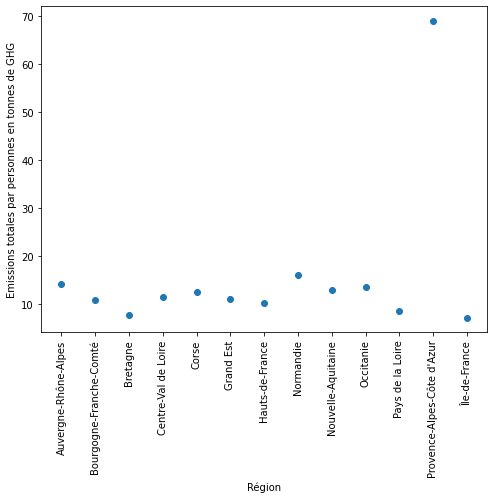

In [102]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg['region_name'], emissions_communes_reg['emissions_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')

Since polars works the same way as pandas on this point, I only imported the work done on the pandas notebook.

I'm surprised that Ile de France is so low in terms of GHG's emissions per person compared to the PACA region which is above every others regions. It is probably linked to the population of each region that has a huge impact on the GHG's emissions.

Text(0, 0.5, "Nombre d'habitants")

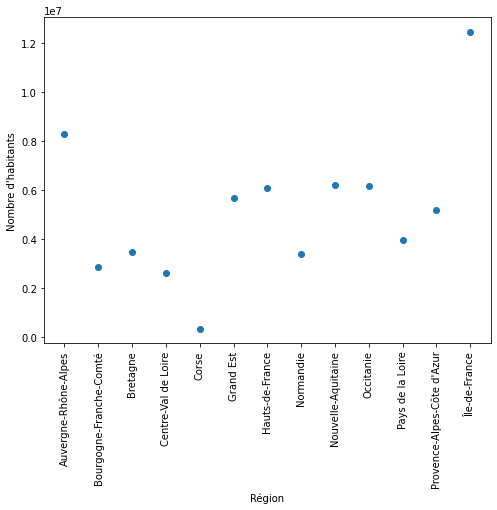

In [103]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['population_totale'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Nombre d\'habitants')

So indeed in Ile de France, the number of inhabitants is high and this has an impact on the GHG emissions per person. To compare, PACA, that is less populated gets the reverse effect, and this explains why the GHG's emissions per person is so high. To have a better look on these datas I will plot a graph with these two informations on the same graph. I use chatGPT for the syntax and the web page : https://koor.fr/Python/Tutoriel_Scipy_Stack/matplotlib_multiples_diagrammes.wp
that present an example of a graph with two datasets.

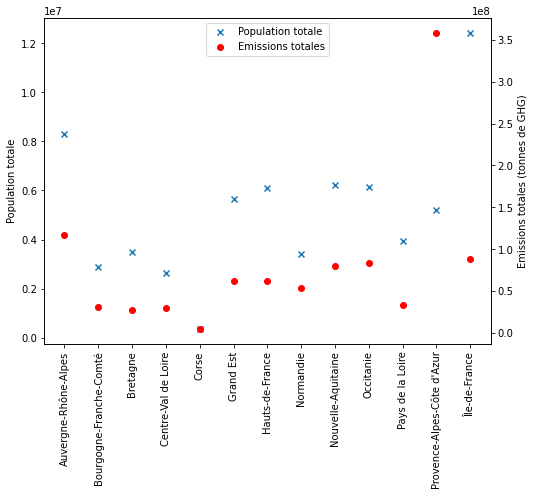

In [104]:
fig, ax1 = plt.subplots(figsize = (8,6))
ax1.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['emissions_totales_reg'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

It is easier, with this graph, to understand why the PACA region is that much different compared to the others region. Indeed this is the most polluting region, probably due to the tourism activity, but also the least populated region (throughout the year it is only during summer that there is a peak of population), wich mean that the pollution per person is higher comapared to Ile de France. 

Now I plot the emissions's quantity for each department. For lisibility reasons I had to divided the database in two parts.

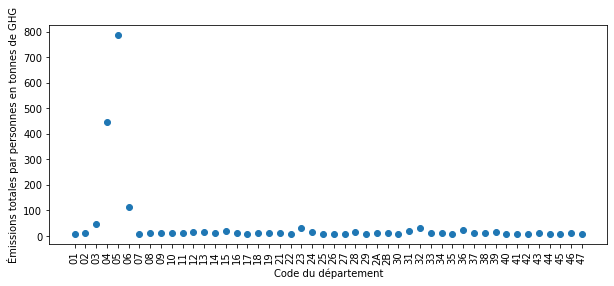

In [105]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)

plt.scatter(range(len(données_limités_début)), données_limités_début['emissions_par_personne'])

plt.xticks(ticks=range(len(données_limités_début)), labels=données_limités_début['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

Departments 4 and 5 are way above others departments, to have a better look on the others departments I plot the same graph without 4 and 5.

Unlike panda, there is no problem to deal with litteral data here. However I still needed chatGPT for the syntax of the function filter, and I used the online doc for the functon is_in and not_.

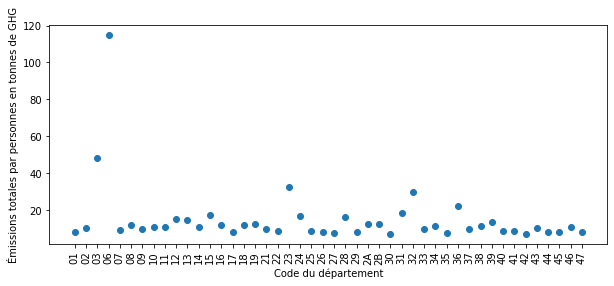

In [106]:
plt.figure(figsize = (10,8))

donnees_limitees_debut = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)
donnees_limitees_debut = donnees_limitees_debut.filter(pl.col('departement_code').is_in(['04', '05']).not_())

plt.scatter(range(len(donnees_limitees_debut)), donnees_limitees_debut['emissions_par_personne'])

plt.xticks(ticks=range(len(donnees_limitees_debut)), labels=donnees_limitees_debut['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

Department 6 also flattens the scale so I remove it from the list to plot.

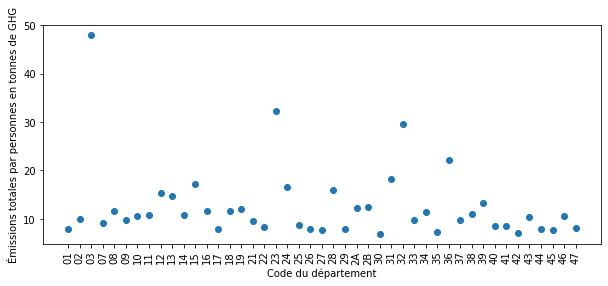

In [107]:
plt.figure(figsize = (10,8))

donnees_limitees_debut = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)
donnees_limitees_debut = donnees_limitees_debut.filter(pl.col('departement_code').is_in(['04', '05','06']).not_())

plt.scatter(range(len(donnees_limitees_debut)), donnees_limitees_debut['emissions_par_personne'])

plt.xticks(ticks=range(len(donnees_limitees_debut)), labels=donnees_limitees_debut['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

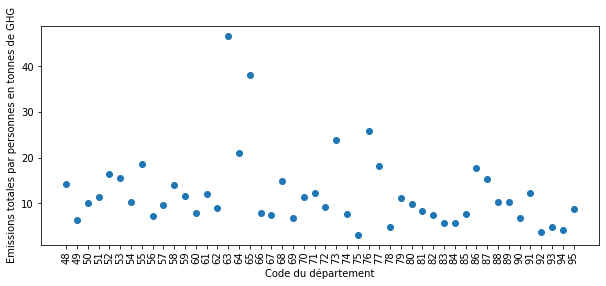

In [108]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))

plt.scatter(données_limités_début['departement_code'], données_limités_début['emissions_par_personne'])

plt.xlabel('Code du département')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.5)

We get the same results we obtain with pandas

Most of the departments have an emissions quantity between 10 and 20 tons of GHG per year. The mondial average is around 4.4 tons, and for a developped country like France around 8 tons of GHG. The surestimation is probably due to the transport international columns that has not been correctly treated. 

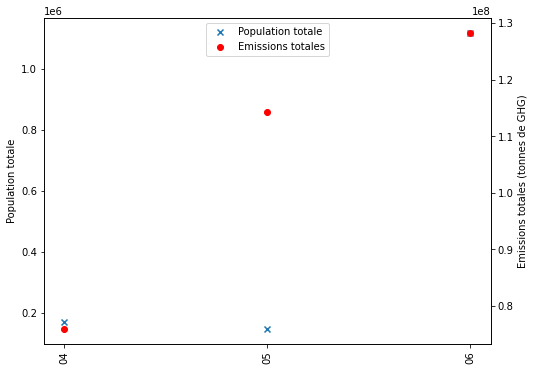

In [109]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.filter(pl.col('departement_code').is_in(['04', '05', '06']))
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

Just like with the study on the region, there is a huge different between the total population and the quantity of emissions. To compare we look the same grph with the others datas.

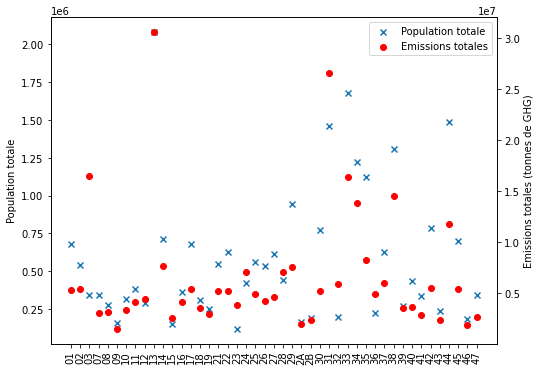

In [110]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.head((emissions_communes_dep.shape[0]//2))
selected_data = selected_data.filter(pl.col('departement_code').is_in(['04', '05', '06']).not_())
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

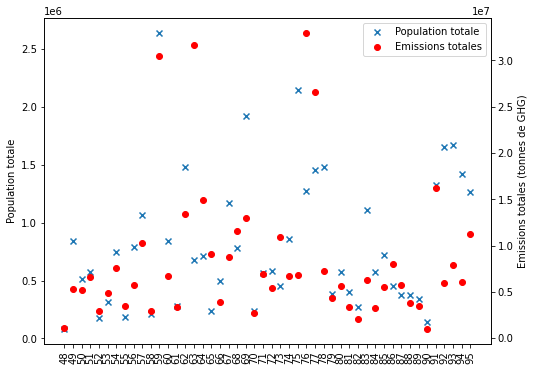

In [111]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))
selected_data = selected_data.filter(pl.col('departement_code').is_in(['04', '05', '06']).not_())
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

The majority of department have no major differences between population and emissions. The extreme values that we find can be caused by the error made on the transport columns when dealing with missing values.

It could be interessant to compare the pollution between cities, but the huge amount of cities would make the analysis unreadable. So I've decided to limit the grahs to some cities in France : The big cities like Paris, MArseille, Lille, Lyon, Bordeaux. And I've added the following : Nantes, Toulouse, Nice, Strasbourg, Grenoble, Montpellier, Orleans, brest. For Paris, Lyon and Marseille, the names are divided between each district of the city. Since I've not found a way to treat this faster, like this can exist in SQL with the key word 'LIKE', I have done it manually. 

Text(0, 0.5, 'Emissions par personne (tonnes GHG)')

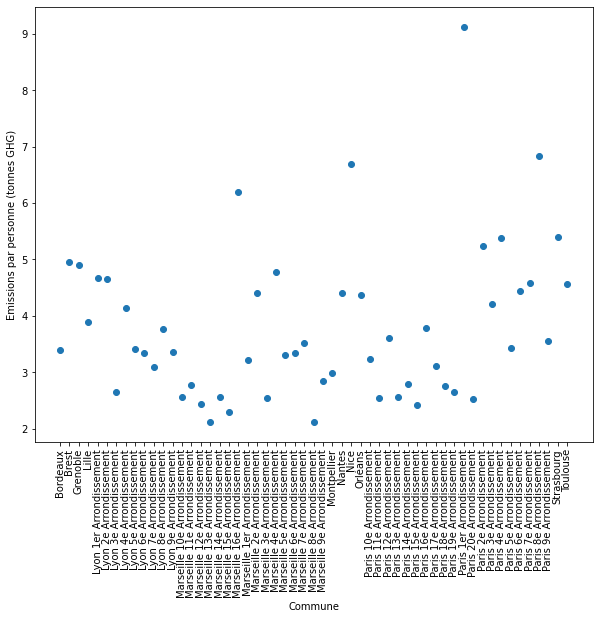

In [112]:
villes = ['Paris 1er Arrondissement', 'Paris 2e Arrondissement',  'Paris 3e Arrondissement', 'Paris 4e Arrondissement', 'Paris 5e Arrondissement',
          'Paris 6e Arrondissement', 'Paris 7e Arrondissement','Paris 8e Arrondissement', 'Paris 9e Arrondissement',
          'Paris 10e Arrondissement', 'Paris 11e Arrondissement', 'Paris 12e Arrondissement', 'Paris 13e Arrondissement',
          'Paris 14e Arrondissement', 'Paris 15e Arrondissement', 'Paris 16e Arrondissement', 'Paris 17e Arrondissement',
          'Paris 18e Arrondissement', 'Paris 19e Arrondissement', 'Paris 20e Arrondissement', 'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement', 
          'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement', 
          'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement', 'Marseille 9e Arrondissement', 'Marseille 10e Arrondissement', 
          'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement', 'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement', 'Marseille 15e Arrondissement',
          'Marseille 16e Arrondissement', 'Lyon 1er Arrondissement', 'Lyon 2e Arrondissement', 'Lyon 3e Arrondissement',
          'Lyon 4e Arrondissement', 'Lyon 5e Arrondissement', 'Lyon 6e Arrondissement', 'Lyon 7e Arrondissement', 
          'Lyon 8e Arrondissement', 'Lyon 9e Arrondissement', 'Lille', 'Bordeaux', 'Toulouse', 'Nice', 'Strasbourg', 
          'Nantes', 'Orléans', 'Montpellier', 'Grenoble', 'Brest']
selected_data = emissions_communes_df.group_by('commune').sum()
colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

selected_data= selected_data.with_columns(emissions_totales_com = pl.sum_horizontal(colonnes))
selected_data = selected_data.with_columns(emissions_par_personne = pl.col('emissions_totales_com')/pl.col('population_totale'))

selected_data = selected_data.filter(pl.col('commune').is_in(villes))
selected_data = selected_data.sort('commune')
plt.figure(figsize = (10,8))
plt.scatter(selected_data['commune'], selected_data['emissions_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Commune')
plt.ylabel('Emissions par personne (tonnes GHG)')




Par manque de temps je n'ai pas réussi à finir le reste des graphiques produits avec pandas, je vous transmets tout de même cette version incomplète.

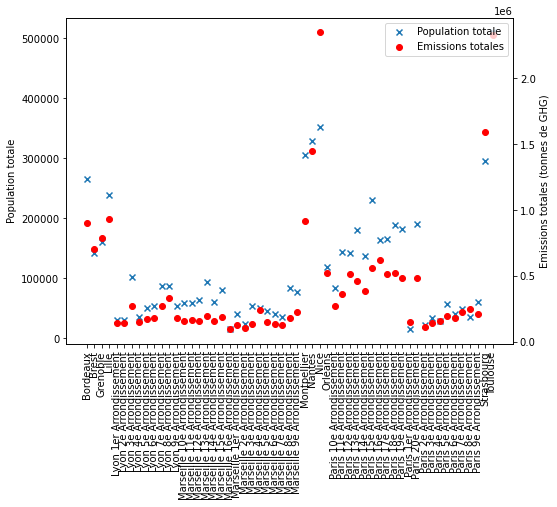

In [113]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = selected_data.filter(pl.col('commune').is_in(villes))
ax1.scatter(selected_data['commune'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['commune'],selected_data['emissions_totales_com'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

Not suprisingly each distrct of great city are less polluting than others towns with less inhabitants but overall big cities like Paris or Marseille are more polluting when we look the total pollution. However since they are also more populated the pollution per person is less important. 

It is interressant to look upon the different emissions fields. I will plot the graphs of each emissions sectors for each regions. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

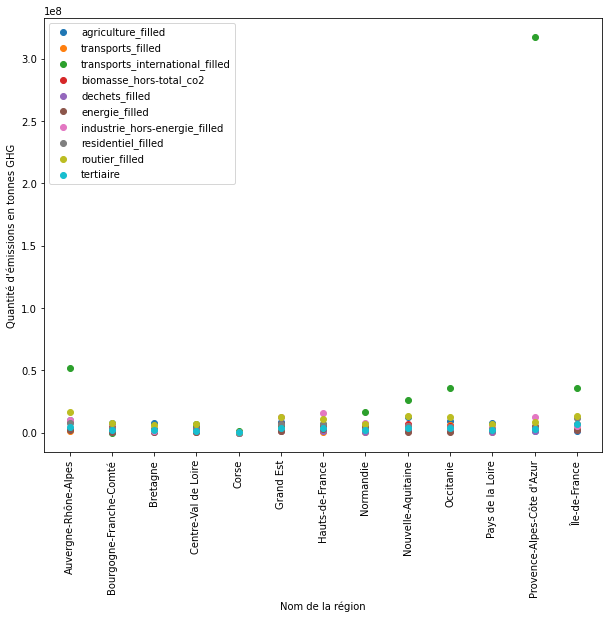

In [114]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled',
            'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
            'residentiel_filled', 'routier_filled', 'tertiaire']
for c in colonnes :
    plt.scatter(selected_data['region_name'], selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

Since the international transport flatts the scale, i will plot the data without this category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

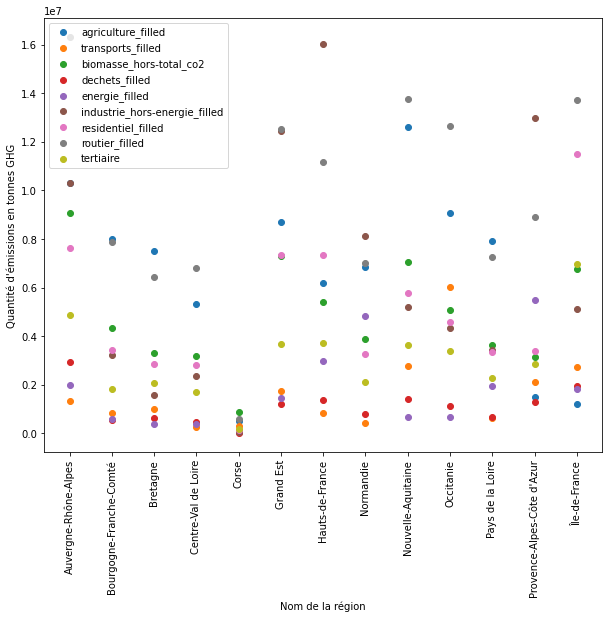

In [115]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['agriculture_filled', 'transports_filled', 
            'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
            'residentiel_filled', 'routier_filled', 'tertiaire']
for c in colonnes :
    plt.scatter(selected_data['region_name'], selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

It is clear that the most polluting sectors (after banning the international transport) are the 'routier' sector and the 'industrie hors-energie', with an average of 10^7 tons of GHG emitted each year and by region.

It is also interesting to look only the transport categorie, which is often perceived to be the most polluting.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

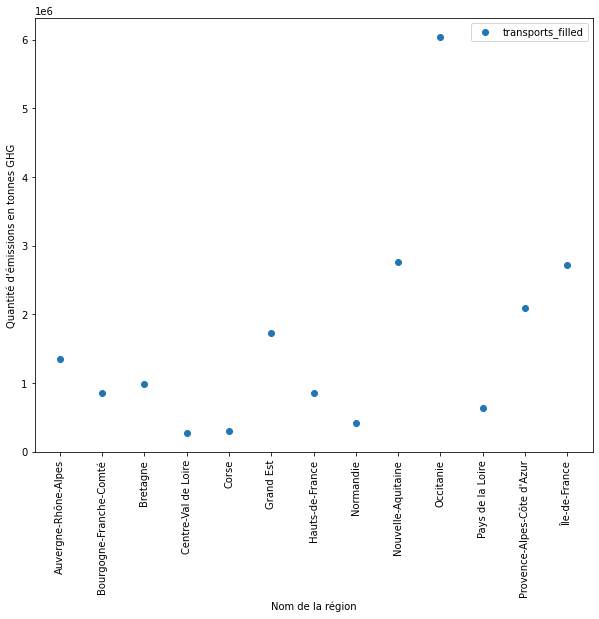

In [116]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['transports_filled']
for c in colonnes :
    plt.scatter(selected_data['region_name'], selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

With this graph, Occitanie appears to be the most polluting region in the transport field. It may be because it is th region the less well served by the rail network. So people have to find other way of transports that are more polluting (cars are one of them).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

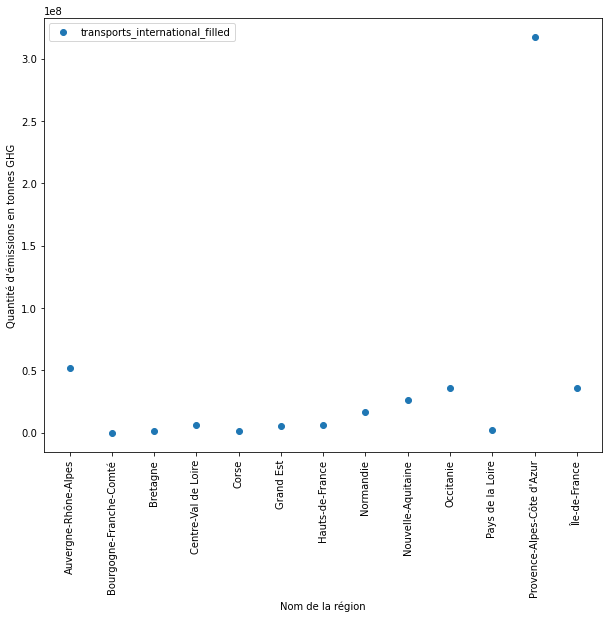

In [117]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['transports_international_filled']
for c in colonnes :
    plt.scatter(selected_data['region_name'], selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

I still plot the data related to the international transport, and it is the PACA region that appears to be the most polluting. It's consistent because it is one of the most attractive region for tourists, but it would be the only logical ones, other could be disproportionnate due to the potential mistreatment of missing values in part 2.